In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

In [2]:
df = pd.read_csv("data/Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [32]:
df.Churn.value_counts().reset_index()

,index,Churn
0,No,5174
1,Yes,1869


## Opt 1 : Within the loop 

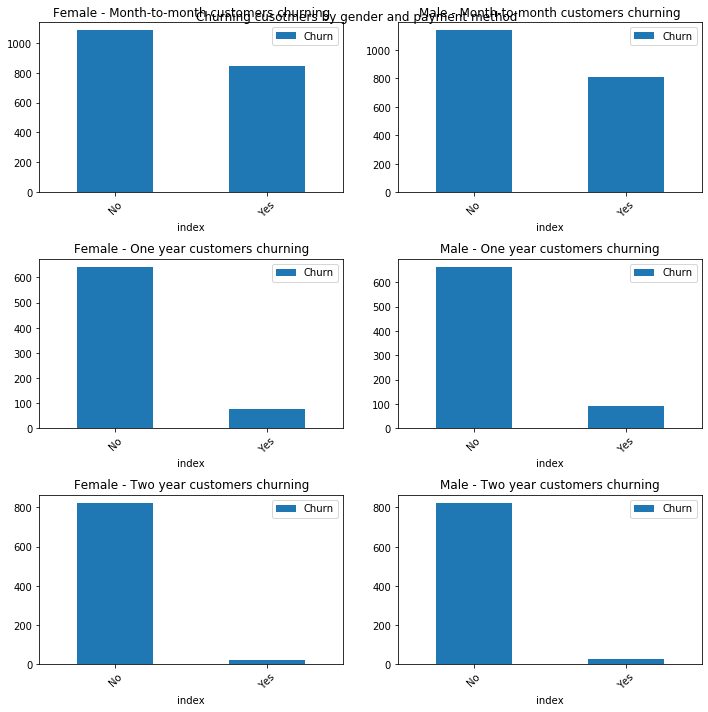

In [42]:
# Create barcharts of total churning customers by contract type by gender
row = df.Contract.unique()
col = df.gender.unique()
fig, axes = plt.subplots(len(row),len(col),figsize=(10,10))

for i,contractType in enumerate(row):
    for j,genderType in enumerate(col):
        # filter data based on column and row indicated
        dftemp =  df.query("Contract == '{}' and gender=='{}'".format(contractType, genderType))
        
        # calculate aggregate value
        dfplot = dftemp.Churn.value_counts().reset_index()
        
        # Create subplot
        dfplot.plot.bar(x='index', y='Churn', ax=axes[i,j], rot = 45)
        
        # Set the layout by axes
        axes[i,j].set_title("{} - {} customers churning".format(genderType,contractType))

plt.suptitle('Churning cusotmers by gender and payment method')
plt.tight_layout(h_pad=1)

## Opt 2 : Outside the loop

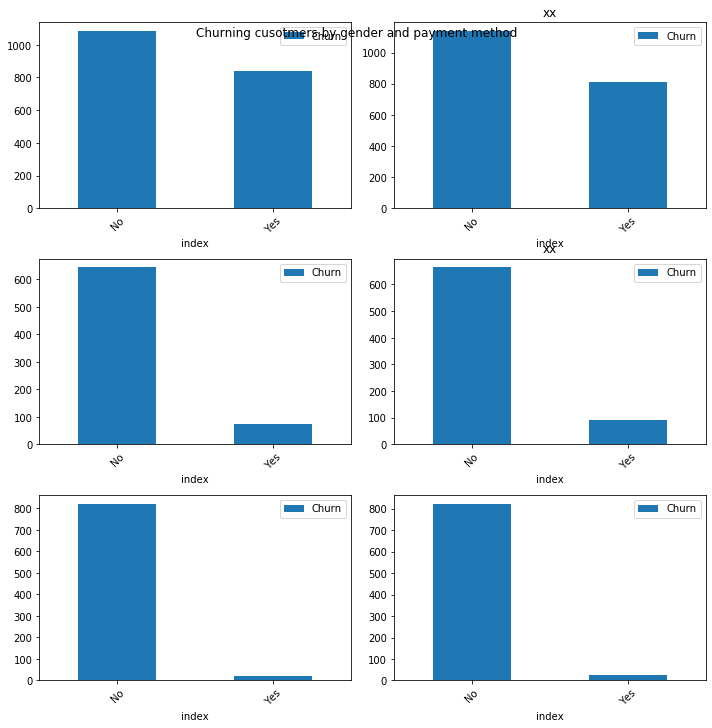

In [53]:
# Create barcharts of total churning customers by contract type by gender
row = df.Contract.unique()
col = df.gender.unique()
fig, axes = plt.subplots(len(row),len(col),figsize=(10,10))

for i,contractType in enumerate(row):
    for j,genderType in enumerate(col):
        # filter data based on column and row indicated
        dftemp =  df.query("Contract == '{}' and gender=='{}'".format(contractType, genderType))
        
        # calculate aggregate value
        dfplot = dftemp.Churn.value_counts().reset_index()
        
        # Create subplot
        dfplot.plot.bar(x='index', y='Churn', ax=axes[i,j], rot = 45)

plt.suptitle('Churning cusotmers by gender and payment method')
plt.tight_layout(h_pad=1)


axes[0,1].set_title("xx")
axes[1,1].set_title("xx")

plt.show()

## Opt 3 : Outside loop - subplot ID flattened

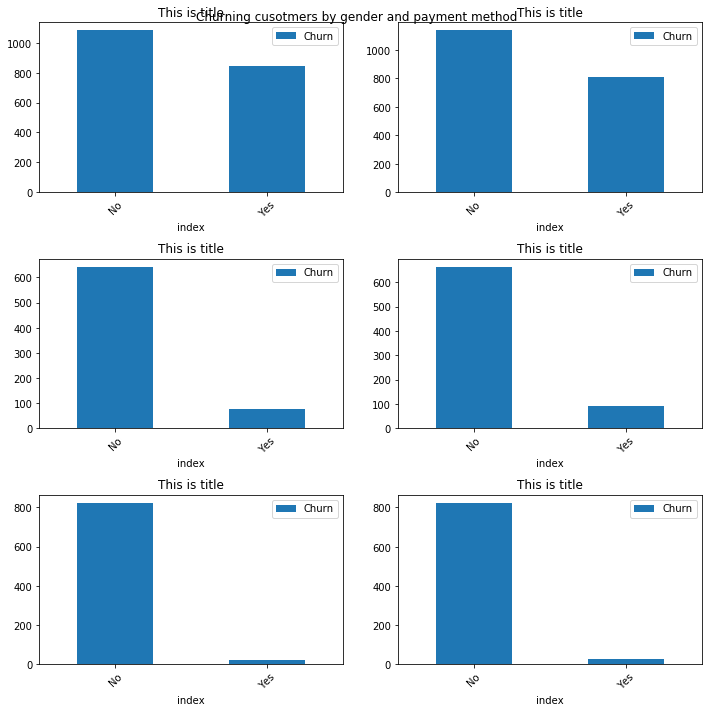

In [45]:
# Create barcharts of total churning customers by contract type by gender
row = df.Contract.unique()
col = df.gender.unique()
fig, axes = plt.subplots(len(row),len(col),figsize=(10,10))

for i,contractType in enumerate(row):
    for j,genderType in enumerate(col):
        # filter data based on column and row indicated
        dftemp =  df.query("Contract == '{}' and gender=='{}'".format(contractType, genderType))
        
        # calculate aggregate value
        dfplot = dftemp.Churn.value_counts().reset_index()
        
        # Create subplot
        dfplot.plot.bar(x='index', y='Churn', ax=axes[i,j], rot = 45)
        
        # Set the layout by axes
        axes[i,j].set_title("{} - {} customers churning".format(genderType,contractType))

plt.suptitle('Churning cusotmers by gender and payment method')
plt.tight_layout(h_pad=1)

axes = axes.ravel()
for i in range(len(row)*len(col)):
    axes[i].set_title("This is title")